# Machine Learning Forecasting

In [1]:
"""

@ author: Taehyeong Kim, Fusion Data Analytics and Artificial Intelligence Lab

"""

import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn as sk
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

import os
import random

seed=1011

def set_seeds(seed=seed):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)

set_seeds()

import warnings
warnings.filterwarnings('ignore')

print("scikit-learn : ", sk.__version__)

scikit-learn :  0.24.2


## Data Preprocessing

In [2]:
# Read data file
data = pd.read_excel("./sampling_data.xlsx", header=0, engine='openpyxl')
data.drop("item", axis=1, inplace=True)

data['2010sprt'] = data['2010ea'] * data['2010rate']
data['2011sprt'] = data['2011ea'] * data['2011rate']
data['2012sprt'] = data['2012ea'] * data['2012rate']
data['2013sprt'] = data['2013ea'] * data['2013rate']
data['2014sprt'] = data['2014ea'] * data['2014rate']
data['2015sprt'] = data['2015ea'] * data['2015rate']
data['2016sprt'] = data['2016ea'] * data['2016rate']

data.head()

,2010ea,2010rate,2010OP,2010SORT,2011ea,2011rate,2011OP,2011SORT,2012ea,2012rate,...,2016OP,2016SORT,Forecasting,2010sprt,2011sprt,2012sprt,2013sprt,2014sprt,2015sprt,2016sprt
0,0.0,0.000000,123488,2007,2.0,2.00,145911,2285,4.0,2.50,...,129946,2064,1,0.000000,4.00,10.0,6.0,28.0,0.0,4.0
1,3.0,1.000000,123488,2007,5.0,1.75,145911,2285,12.0,1.75,...,129946,2064,1,3.000000,8.75,21.0,38.0,42.0,15.0,8.0
2,0.0,0.000000,1080820,14283,0.0,0.00,1123702,12972,0.0,0.00,...,1038927,12553,1,0.000000,0.00,0.0,0.0,0.0,0.0,0.0
3,4.0,2.000000,123488,2007,5.0,2.50,145911,2285,1.0,1.00,...,129946,2064,1,8.000000,12.50,1.0,2.0,1.0,0.0,0.0
4,16.0,2.628571,255942,3168,1.0,1.00,261298,3404,4.0,2.50,...,231134,3135,1,42.057143,1.00,10.0,12.0,25.0,8.0,6.0


In [3]:
X_train = data.drop(columns=['2016ea', '2016rate', '2016OP', '2016SORT', '2016sprt', 'Forecasting'])
X_test = data.drop(columns=['2016ea', '2016rate', '2016OP', '2016SORT', '2016sprt', 'Forecasting'])
y_train = data["2016ea"].apply(lambda x : 0 if x<0.5 else 1).values
y_test = data.Forecasting.values

scaler=StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

X_train.shape, X_test.shape

((2000, 30), (2000, 30))

## Machine Learning

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

import xgboost
import lightgbm
import catboost
print("xgboost : ", xgboost.__version__)
print("lightgbm : ", lightgbm.__version__)
print("catboost : ", catboost.__version__)

xgboost :  1.2.0
lightgbm :  3.1.1
catboost :  0.25.1


In [5]:
%%time

estimator1 = LogisticRegression(n_jobs=-1, random_state=seed)
estimator2 = GaussianNB()
estimator3 = KNeighborsClassifier(n_jobs=-1)
estimator4 = SVC(random_state=seed, probability=True)
estimator5 = DecisionTreeClassifier(random_state=seed)
estimator6 = RandomForestClassifier(n_jobs=-1, random_state=seed)
estimator7 = AdaBoostClassifier(random_state=seed)
estimator8 = XGBClassifier(n_jobs=-1, random_state=seed)
estimator9 = LGBMClassifier(n_jobs=-1, random_state=seed)
estimator10 = CatBoostClassifier(verbose=False, random_state=seed)
estimator11 = MLPClassifier(random_state = seed)

base_estimators = [estimator1, estimator2, estimator3, estimator4, estimator5,
                   estimator6, estimator7, estimator8, estimator9, estimator10,
                   estimator11]

model_name = ["LR", "NB", "KNN", "SVM", "DT", 
              "RF", "AB", "XGB", "LGBM", "CB",
              "MLP"]

for index, estimator in enumerate(base_estimators):
    
    estimator.fit(X_train, y_train)
    y_pred=estimator.predict(X_test)
    
    print("model:", model_name[index])
    print("accuracy:", round(accuracy_score(y_test, y_pred), 3))
    print("precision:", round(precision_score(y_test, y_pred), 3))
    print("recall:", round(recall_score(y_test, y_pred), 3))
    print("f1:", round(f1_score(y_test, y_pred), 3))
    print("")

model: LR
accuracy: 0.738
precision: 0.873
recall: 0.557
f1: 0.68

model: NB
accuracy: 0.61
precision: 0.882
recall: 0.253
f1: 0.393

model: KNN
accuracy: 0.774
precision: 0.817
recall: 0.706
f1: 0.758

model: SVM
accuracy: 0.716
precision: 0.87
recall: 0.508
f1: 0.641

model: DT
accuracy: 0.804
precision: 0.84
recall: 0.751
f1: 0.793

model: RF
accuracy: 0.803
precision: 0.837
recall: 0.752
f1: 0.792

model: AB
accuracy: 0.792
precision: 0.852
recall: 0.705
f1: 0.772

model: XGB
accuracy: 0.804
precision: 0.861
recall: 0.725
f1: 0.787

model: LGBM
accuracy: 0.808
precision: 0.874
recall: 0.719
f1: 0.789

model: CB
accuracy: 0.802
precision: 0.872
recall: 0.707
f1: 0.781

model: MLP
accuracy: 0.782
precision: 0.856
recall: 0.677
f1: 0.756

Wall time: 8.1 s


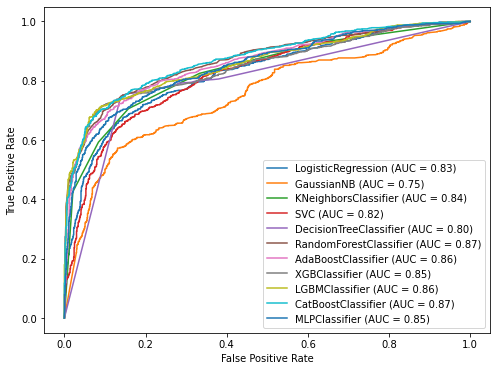

In [6]:
# ROC_Curve
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
for clf in base_estimators:
    plot_roc_curve(clf, X_test, y_test, ax=ax)
    
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig("./figure/ML_AUROC.png")
plt.show()

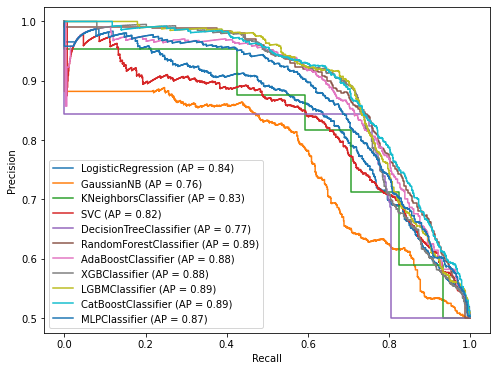

In [7]:
# Precision_Recall_Curve
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
for clf in base_estimators:
    plot_precision_recall_curve(clf, X_test, y_test, ax=ax)
    
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.savefig("./figure/ML_AUPR.png")
plt.show()